In [1]:
import os

In [2]:
def get_filepaths(dir_path, subdir):
    sub_dir_path = os.path.join(dir_path, subdir)
    fnames = os.listdir(sub_dir_path)
    return [os.path.join(sub_dir_path, fname) for fname in fnames]

def find_fpaths_all(fpaths, substring):
    return (fpath for fpath in fpaths if substring in fpath)

def find_fpath(fpaths, substring):
    return next(find_fpaths_all(fpaths, substring))

def read_lines(fname, end = -1):
    with open(fname, 'r') as lines:
        for i, line in enumerate(lines):
            if i == end:
                break
            yield line.strip()

def read_file(data_dir, subdir, substring, number):
    fpaths = get_filepaths(data_dir, subdir)
    fpath = find_fpath(fpaths, substring)
    return list(read_lines(fpath, end = number))

def read_files(data_dir, subdir, substring, number):
    fpaths = get_filepaths(data_dir, subdir)
    fpaths = find_fpaths_all(fpaths, substring)
    return [list(read_lines(fpath, end = number)) for fpath in fpaths]

In [3]:
dir_flickr = os.path.join('data', 'flickr30k')
dir_demo = os.path.join('data', 'demo')

image_ids_val = read_file(dir_flickr, 'image_splits', 'val', 100)
image_ids_train = read_file(dir_flickr, 'image_splits', 'train', 1000)

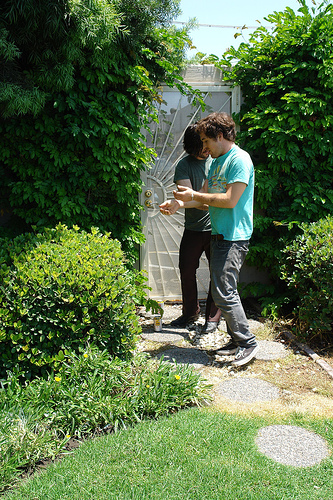

In [4]:
impath = os.path.join(dir_flickr, 'images', image_ids_train[0])
from IPython.display import Image 
Image(filename=impath, width=150, height=150)

In [5]:
captions_train = read_files(dir_flickr, os.path.join( 'captions', 'en'), 'train', 1000)
captions_val = read_files(dir_flickr, os.path.join( 'captions', 'en'), 'val', 100)

In [6]:
[c[980] for c in captions_train]

['A man catches a decent sized fish and is taking it off the hook',
 'Man in boat wearing athletic shorts, a backwards baseball cap and sunglasses unhooks a fish he has caught while fishing.',
 'A man in a gray shirt and white hat standing in a boat holding a fish.',
 'There is a man with a gray shirt on his speed boat who caught a big fish, and has started to cut it open.',
 'A man on a boat unhooking a fish he just caught.']

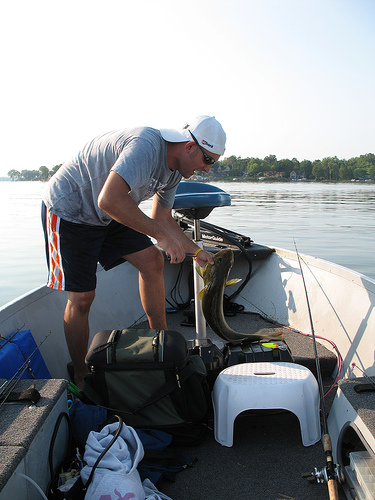

In [7]:
impath = os.path.join(dir_flickr, 'images', image_ids_train[980])
from IPython.display import Image 
Image(filename=impath, width=150, height=150)

In [10]:
# TODO store splits in demo splits dir

fname_out = os.path.join('data', 'demo', 'image_splits', 'val_images.txt')
all_lines = [f'{im_id}\n' for im_id in image_ids_val]
with open(fname_out, 'w') as file_out:
    file_out.writelines(all_lines)
    
fname_out = os.path.join('data', 'demo', 'image_splits', 'train_images.txt')
all_lines = [f'{im_id}\n' for im_id in image_ids_train]
with open(fname_out, 'w') as file_out:
    file_out.writelines(all_lines)

In [18]:
import shutil

# TODO: loop over image paths, store in demo image dir
impaths = [os.path.join(dir_flickr, 'images', im_id) for im_id in image_ids_train]
impaths_out = [os.path.join(dir_demo, 'images', im_id) for im_id in image_ids_train]
for im, im_out in zip(impaths, impaths_out):
    shutil.copy(im, im_out)

In [24]:
# TODO: loop over caption file lists, store in demo captions dir
captions_dir = os.path.join('data', 'demo', 'captions', 'en')
for i, clist_i in enumerate(captions_train):
    fname_out = os.path.join(captions_dir, f'train.{i+1}.en')
    all_lines = [f'{c}\n' for c in clist_i]
    with open(fname_out, 'w') as file_out:
        file_out.writelines(all_lines)

In [25]:
captions_dir = os.path.join('data', 'demo', 'captions', 'en')
for i, clist_i in enumerate(captions_val):
    fname_out = os.path.join(captions_dir, f'val.{i+1}.en')
    all_lines = [f'{c}\n' for c in clist_i]
    with open(fname_out, 'w') as file_out:
        file_out.writelines(all_lines)